# DDD Systems: a second rough simulation

In [1]:
%matplotlib inline

![img](http://www.cybertelecom.org/images/baran.gif)

A first simulation of how DDD systems could be generated as graphs with a simple network science approach. It extends the above graph (Baran, Paul. 1964. ‘On Distributed Communications’. Santa Monica, CA.: RAND Corporation. http://www.rand.org/pubs/research_memoranda/RM3420.html.)


# Set up and functions

In [2]:
# Import libraries
import networkx as nx
import matplotlib.pyplot as plt
from random import choice
from math import hypot

In [3]:
# Set up colors
node_color = '#ff6600'
edge_color = '#ffb583'

In [4]:
# We use a random graph for all the systems
G=nx.random_geometric_graph(20,0.125)

# random_geometric_graph is already distributed: https://networkx.github.io/documentation/latest/reference/generated/networkx.generators.geometric.random_geometric_graph.html
# See all the generators here: http://networkx.github.io/documentation/networkx-1.10/reference/generators.html#module-networkx.generators.random_graphs

# position is stored as node attribute data for random_geometric_graph
pos=nx.get_node_attributes(G,'pos')

In [5]:
# Find the center
def find_node_near_center(near_x,near_y):
    # find node near center (near_x,near_y)
    dmin=1
    ncenter=0
    for n in pos:
        x,y=pos[n]
        d=(x-near_x)**2+(y-near_y)**2
        if d<dmin:
            ncenter=n
            dmin=d
    return ncenter

In [6]:
# Find if point inside a circle
# From http://stackoverflow.com/a/487872/2237113

def in_radius(c_x, c_y, r, x, y):
    return hypot(c_x-x, c_y-y) <= r

In [7]:
# Find nodes around a node, with radius 
def find_nodes_near_center(local_hub,local_radius):
    # find node nodes around a node local_hub, with radius local_radius
    local_nodes = []
    for k in pos:
        if in_radius(pos[local_hub][0], pos[local_hub][1], local_radius, pos[k][0], pos[k][1]):
            local_nodes.append(k)
    return local_nodes

In [8]:
# Remove all edges
def remove_all_edges():
    edges = []
    for i in G.edges():
        edges.append(i)
    G.remove_edges_from(edges)

In [9]:
# Get the central node
ncenter = find_node_near_center(0.5,0.5)

# DDD Systems

## Diffuse systems

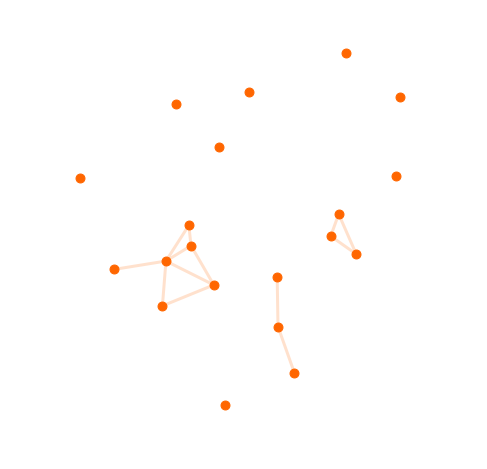

In [10]:
# Diffuse system
# Inspiration from http://stackoverflow.com/questions/17301887/how-to-compute-nearby-nodes-with-networkx

# Clear the graph
remove_all_edges()

# Find closest nodes
distribution_radius = 0.15
all_distributed = {}
for i in G.nodes():
    local_distributed = find_nodes_near_center(i, distribution_radius)
    all_distributed[i] = local_distributed

# Add edges
for d in all_distributed:
    for h in all_distributed[d]:
        G.add_edge(d,h)
    
plt.figure(figsize=(8,8))
nx.draw_networkx_edges(G,pos,alpha=0.4,edge_color=edge_color, width=3.0)
nx.draw_networkx_nodes(G,pos,
                       node_size=80,
                       node_color=node_color,
                       cmap=plt.cm.Reds_r)

plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.axis('off')
plt.savefig('01_diffuse.pdf')

## Decentralized systems

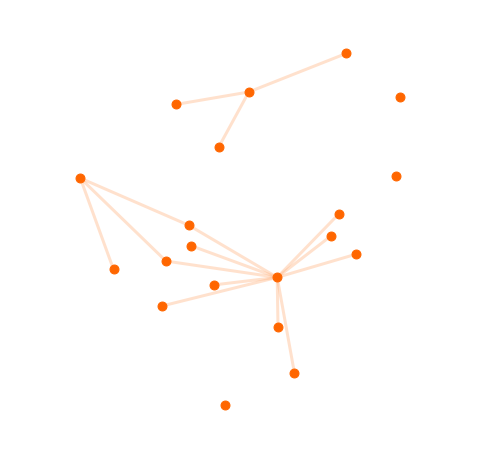

In [11]:
# Decentralized system

# Clear the graph
remove_all_edges()

# pick n random hub nodes
number_of_hubs = 3
hubs = []
for j in range(number_of_hubs):
    hubs.append(choice(range((len(G.nodes())))))

for lb in hubs:
    # Find closest nodes
    distribution_radius = 0.3
    local_distributed = find_nodes_near_center(lb, distribution_radius)
        
    # Add edges around the local center
    for d in local_distributed:
        G.add_edge(lb,d)
        
plt.figure(figsize=(8,8))
nx.draw_networkx_edges(G,pos,alpha=0.4,edge_color=edge_color, width=3.0)
nx.draw_networkx_nodes(G,pos,
                       node_size=80,
                       node_color=node_color,
                       cmap=plt.cm.Reds_r)

plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.axis('off')
plt.savefig('02_decentralized.pdf')

## Centralized systems

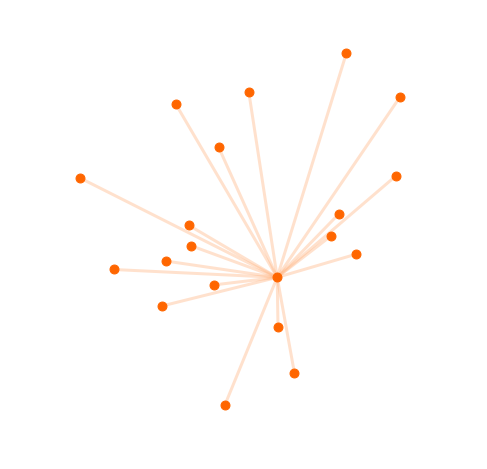

In [12]:
# Centralized

# Clear the graph
remove_all_edges()

# Add edges around the center
for i in G.nodes():
    G.add_edge(ncenter,i)

plt.figure(figsize=(8,8))
nx.draw_networkx_edges(G,pos,alpha=0.4,edge_color=edge_color, width=3.0)
nx.draw_networkx_nodes(G,pos,
                       node_size=80,
                       node_color=node_color,
                       cmap=plt.cm.Reds_r)

plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.axis('off')
plt.savefig('03_centralized.pdf')

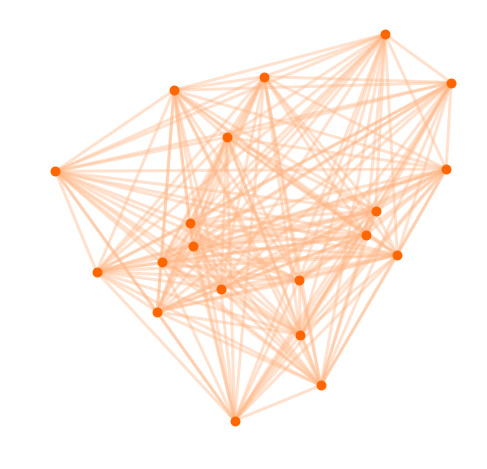

In [13]:
# Distributed
# All nodes are (potentially) connected to each other

# Clear the graph
remove_all_edges()

# Circular layout, to show they are all equivalent
#pos=nx.circular_layout(G)

# Add edges around the center
for i in G.nodes():
    for j in G.nodes():
        G.add_edge(i, j)

plt.figure(figsize=(8,8))
nx.draw_networkx_edges(G,pos,alpha=0.4,edge_color=edge_color, width=3.0)
nx.draw_networkx_nodes(G,pos,
                       node_size=80,
                       node_color=node_color,
                       cmap=plt.cm.Reds_r)



plt.axis('off')
plt.savefig('04_distributed.pdf')